Nucuta Diana 344 C1 Tema 1 ML

In [232]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from tabulate import tabulate
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder

import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


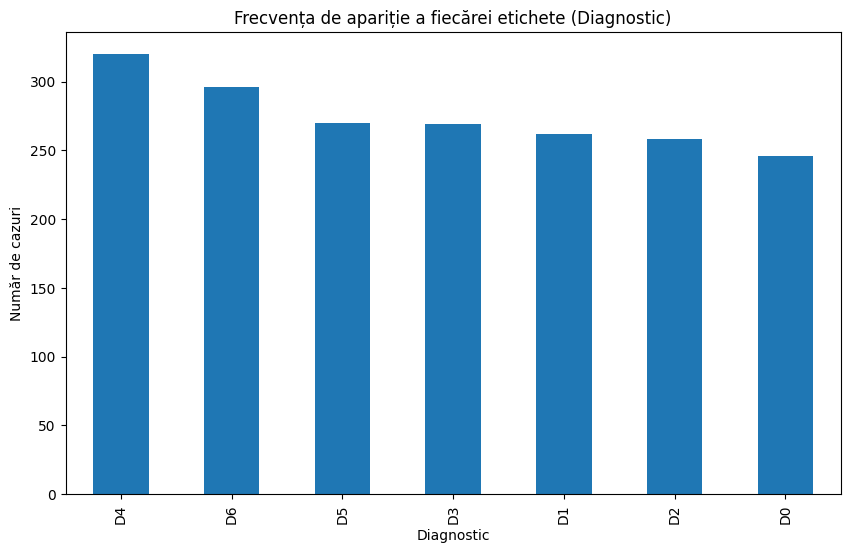

In [225]:


dataset = pd.read_csv("date_tema_1_iaut_2024.csv")

freq_diagnostic = dataset['Diagnostic'].value_counts()

plt.figure(figsize=(10, 6))
freq_diagnostic.plot(kind='bar')
plt.title('Frecvența de apariție a fiecărei etichete (Diagnostic)')
plt.xlabel('Diagnostic')
plt.ylabel('Număr de cazuri')
plt.show()


Observam ca nu sunt diferente mari de aparitii -> set echilibrat

In [226]:
columns = ['Transportation', 'Regular_fiber_diet', 'Diagnostic_in_family_history', 'High_calorie_diet',
           'Sedentary_hours_daily', 'Age', 'Alcohol', 'Est_avg_calorie_intake', 'Main_meals_daily', 'Snacks',
           'Height', 'Smoker', 'Water_daily', 'Calorie_monitoring', 'Weight', 'Physical_activity_level',
           'Technology_time_use', 'Gender', 'Diagnostic']
float_columns = ["Sedentary_hours_daily", "Height", "Weight"]
numeric_columns= ["Regular_fiber_diet" , "Sedentary_hours_daily" , "Age" , "Est_avg_calorie_intake" , "Main_meals_daily" , "Height", "Water_daily", "Weight", 
                  "Physical_activity_level" , "Technology_time_use"]
nominal_columns = ['Transportation', 'Diagnostic_in_family_history', 'High_calorie_diet',
                    'Alcohol', 'Snacks', 'Smoker','Calorie_monitoring', 'Gender', 'Diagnostic']


In [227]:
def string_to_float(word):
    if isinstance(word, int) or isinstance(word, float):
        return word
    if ',' in word:
        parts = word.split(',')
        whole_part = parts[0]
        fractional_part = parts[1]
        number_str = whole_part + '.' + fractional_part
        return float(number_str)
    else:
        return float(word)

converted_numeric_columns = dataset[numeric_columns].applymap(string_to_float)

def remove_outliers(df, numeric_columns, threshold=4):
    for column in numeric_columns:
        z_scores = np.abs(zscore(df[column]))
        df = df[(z_scores < threshold)]
    return df

converted_numeric_df = pd.DataFrame(converted_numeric_columns, columns=numeric_columns)
print(len(converted_numeric_df))
cleaned_converted_numeric_df = remove_outliers(converted_numeric_df, numeric_columns)
print(len(cleaned_converted_numeric_df))

from numpy import mean, absolute

# https://stackoverflow.com/questions/8930370/where-can-i-find-mad-mean-absolute-deviation-in-scipy

def mad(data, axis=None):
    return mean(absolute(data - mean(data, axis)), axis)

def mean_absolute_deviation(series):
    return mad(series)

def median_absolute_deviation(series):
    return np.mean(np.absolute(series - series.median()))

def interquartile_range(series):
    q3, q1 = series.quantile([0.75, 0.25])
    return q3 - q1

for column in converted_numeric_df.columns:
    print(f"\nStatistics for attribute '{column}':")
    print(f"Medie: {converted_numeric_df[column].mean()}")
    print(f"Abaterea standard: {converted_numeric_df[column].std()}")
    print(f"Abaterea medie absolută: {mean_absolute_deviation(converted_numeric_df[column])}")
    print(f"Valoare minimă: {converted_numeric_df[column].min()}")
    print(f"Valoare maximă: {converted_numeric_df[column].max()}")
    print(f"Diferența de valori maxime și minime: {converted_numeric_df[column].max() - converted_numeric_df[column].min()}")
    print(f"Mediană: {converted_numeric_df[column].median()}")
    print(f"Abaterea mediană absolută: {median_absolute_deviation(converted_numeric_df[column])}")
    print(f"Intervalul intercuartil: {interquartile_range(converted_numeric_df[column])}")





1921
1912

Statistics for attribute 'Regular_fiber_diet':
Medie: 3.8449373862571576
Abaterea standard: 62.4396174995684
Abaterea medie absolută: 2.8476367127680824
Valoare minimă: 1.0
Valoare maximă: 2739.0
Diferența de valori maxime și minime: 2738.0
Mediană: 2.387426
Abaterea mediană absolută: 1.9021534143675178
Intervalul intercuartil: 1.0

Statistics for attribute 'Sedentary_hours_daily':
Medie: 3.693571056741281
Abaterea standard: 21.759834908880748
Abaterea medie absolută: 1.1338850443643116
Valoare minimă: 2.21
Valoare maximă: 956.58
Diferența de valori maxime și minime: 954.37
Mediană: 3.13
Abaterea mediană absolută: 0.9628735033836543
Intervalul intercuartil: 0.8700000000000001

Statistics for attribute 'Age':
Medie: 44.79250626392504
Abaterea standard: 633.3118370767136
Abaterea medie absolută: 40.94688616864699
Valoare minimă: 15.0
Valoare maximă: 19685.0
Diferența de valori maxime și minime: 19670.0
Mediană: 22.829753
Abaterea mediană absolută: 24.9989922644456
Intervalul i

C:\Users\diana\AppData\Local\Temp\ipykernel_20076\2152088880.py:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  converted_numeric_columns = dataset[numeric_columns].applymap(string_to_float)


Dupa ce eliminam outlierele, valorile minime si maxime nu mai sunt asa departate.


Atributele unice pentru Transportation: 5
Atributele unice pentru Diagnostic_in_family_history: 2
Atributele unice pentru High_calorie_diet: 2
Atributele unice pentru Alcohol: 4
Atributele unice pentru Snacks: 4
Atributele unice pentru Smoker: 2
Atributele unice pentru Calorie_monitoring: 2
Atributele unice pentru Gender: 2
Atributele unice pentru Diagnostic: 7


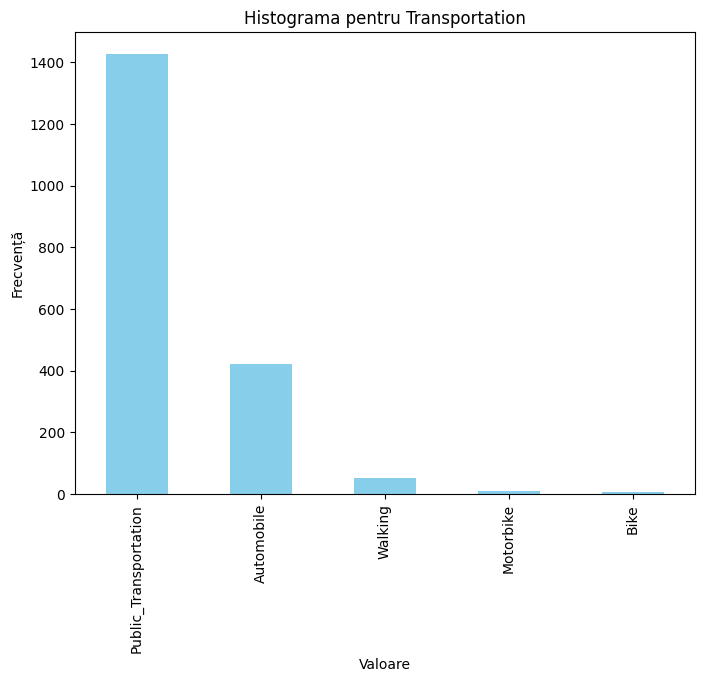

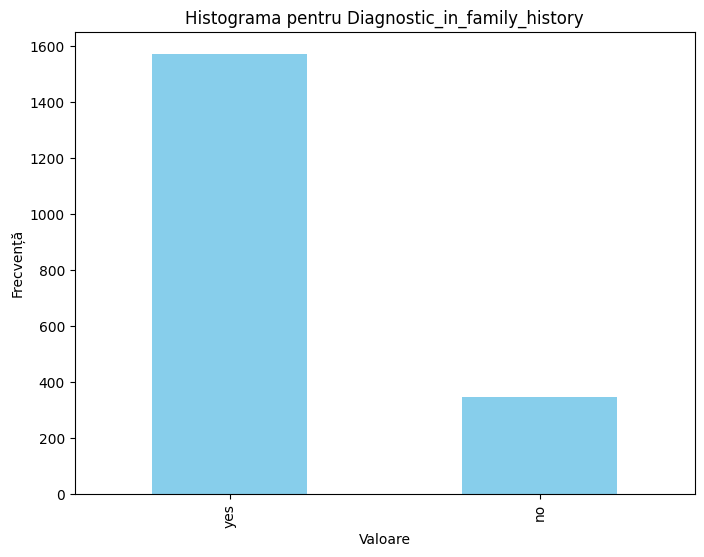

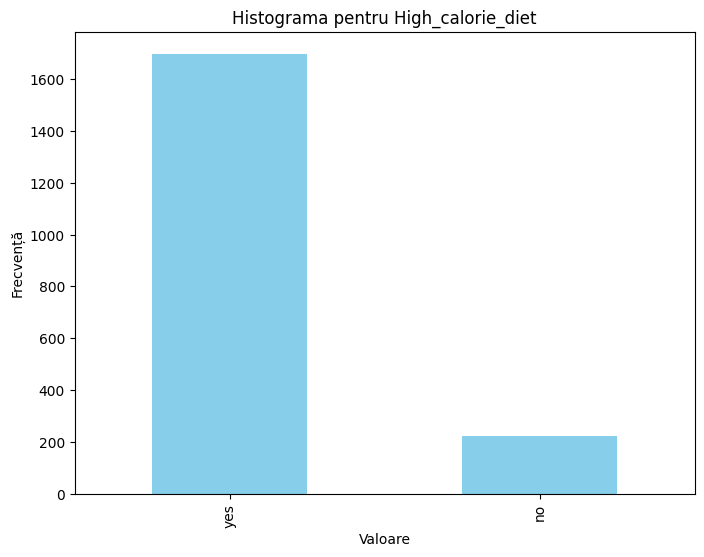

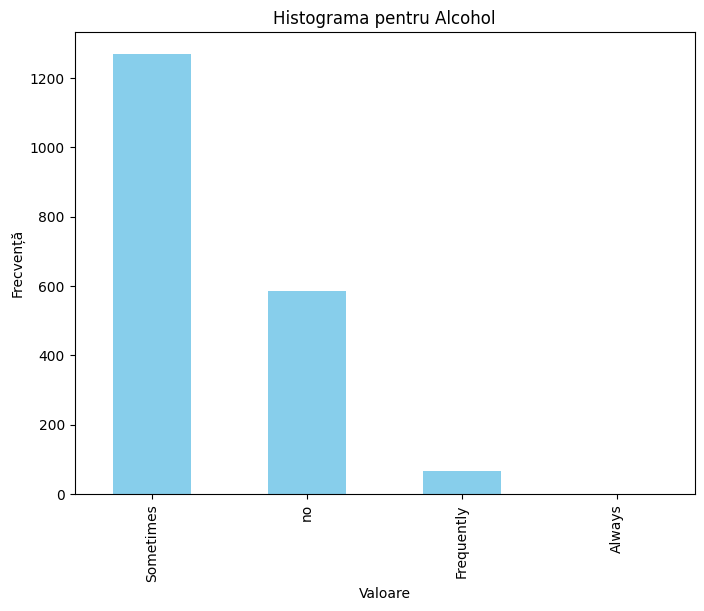

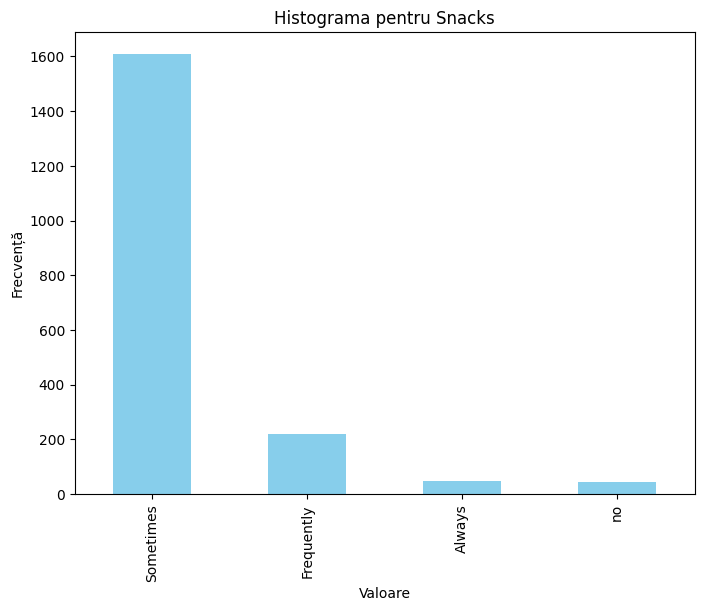

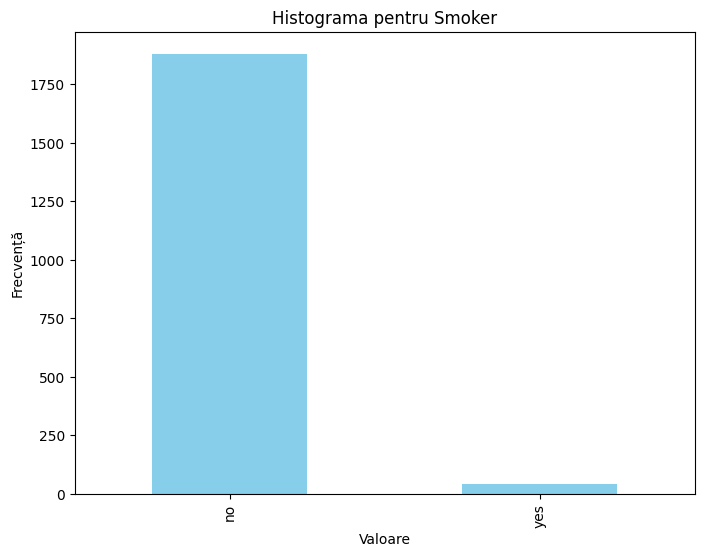

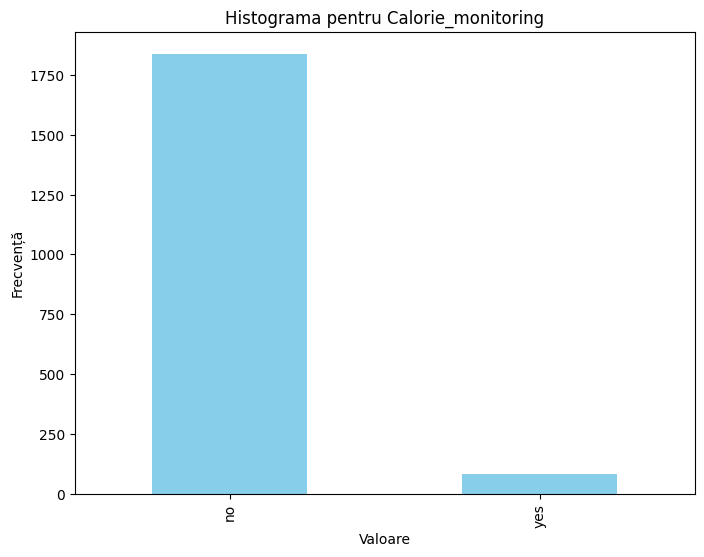

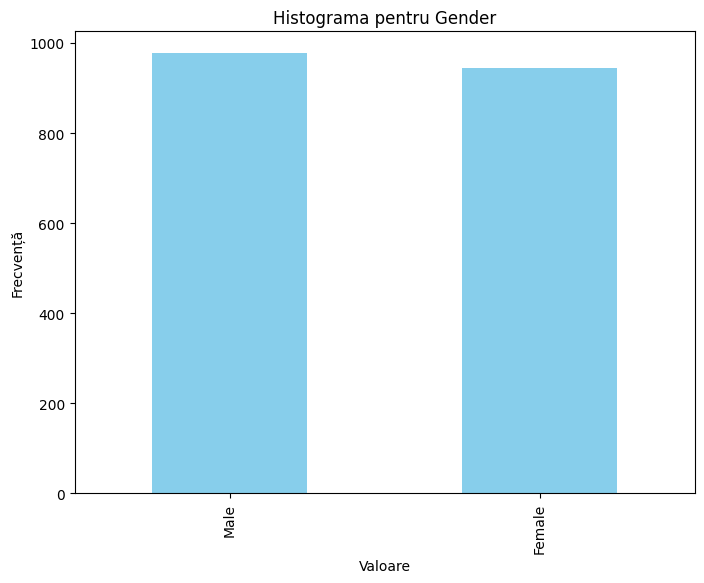

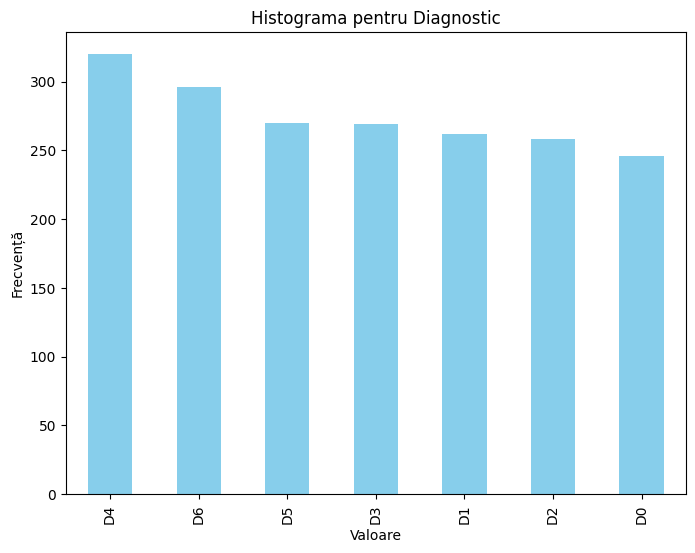

In [228]:
for column in nominal_columns:
    unique_values = dataset[column].nunique()
    print(f"Atributele unice pentru {column}: {unique_values}")

for column in nominal_columns:
    plt.figure(figsize=(8, 6))
    dataset[column].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Histograma pentru {column}')
    plt.xlabel('Valoare')
    plt.ylabel('Frecvență')
    plt.show()


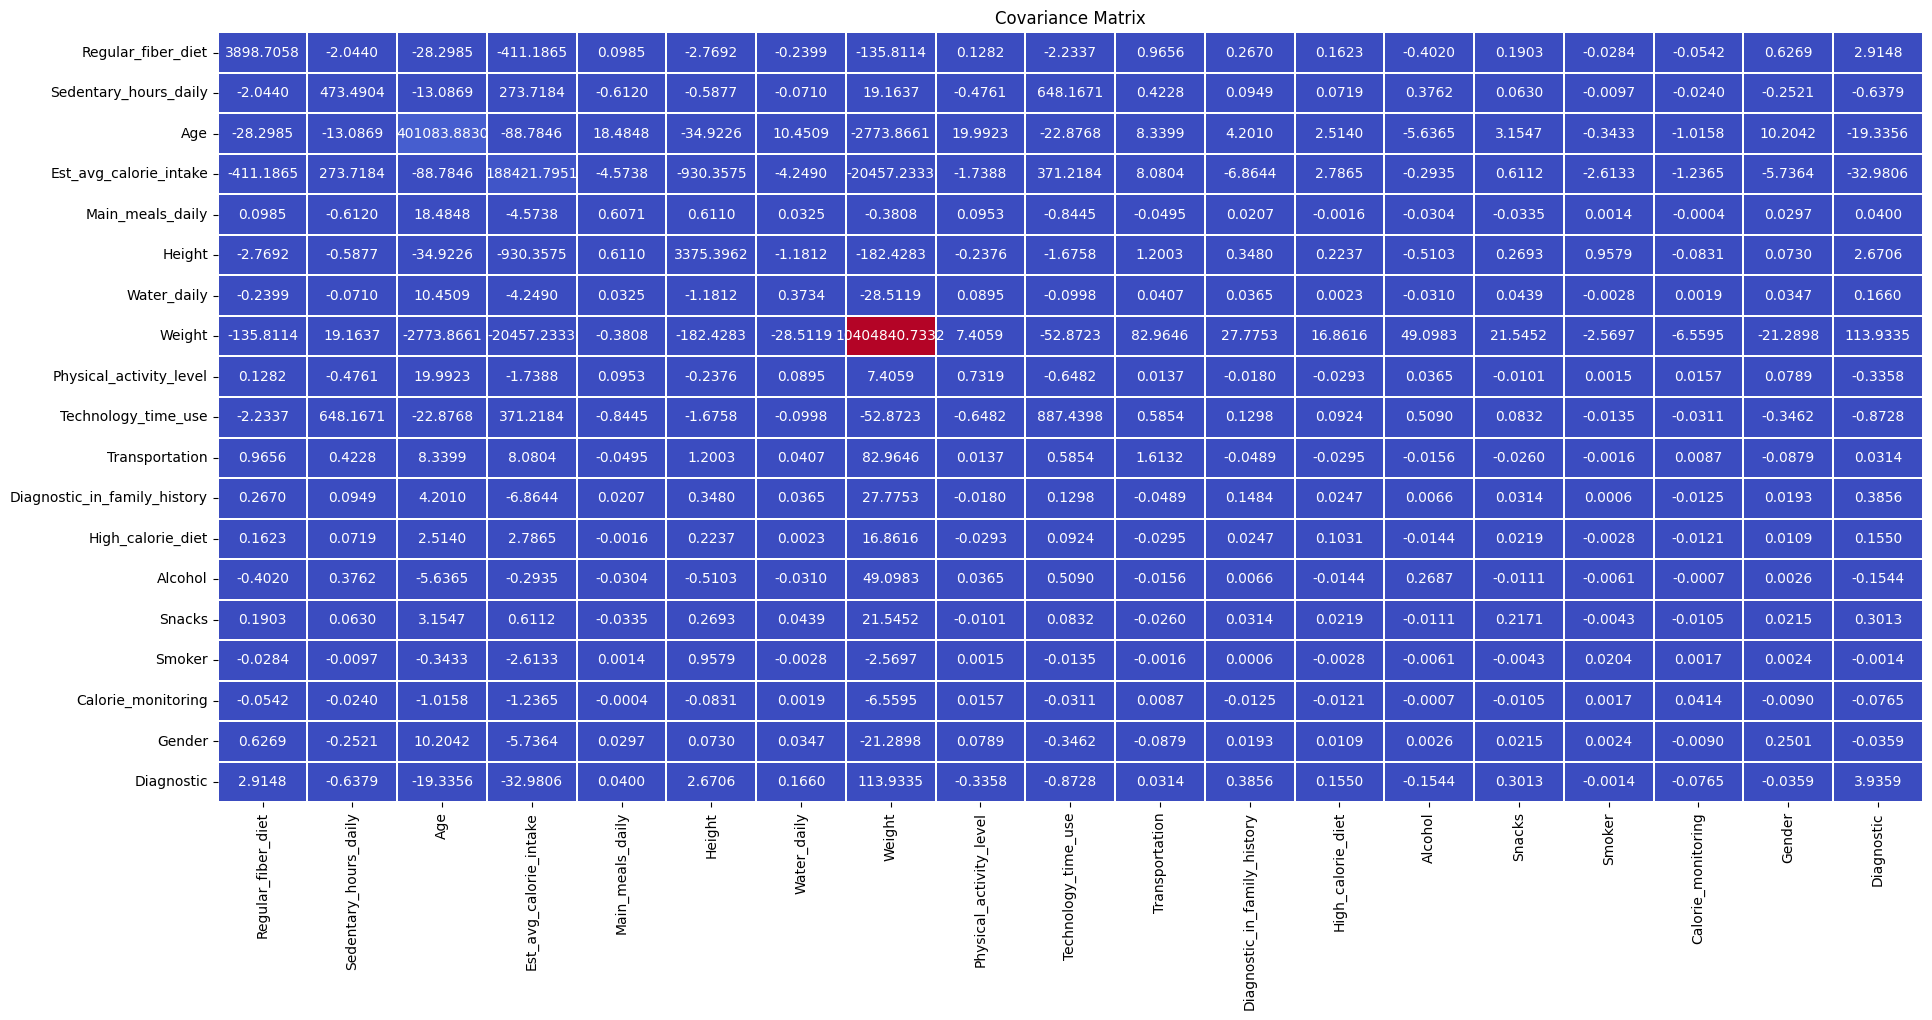

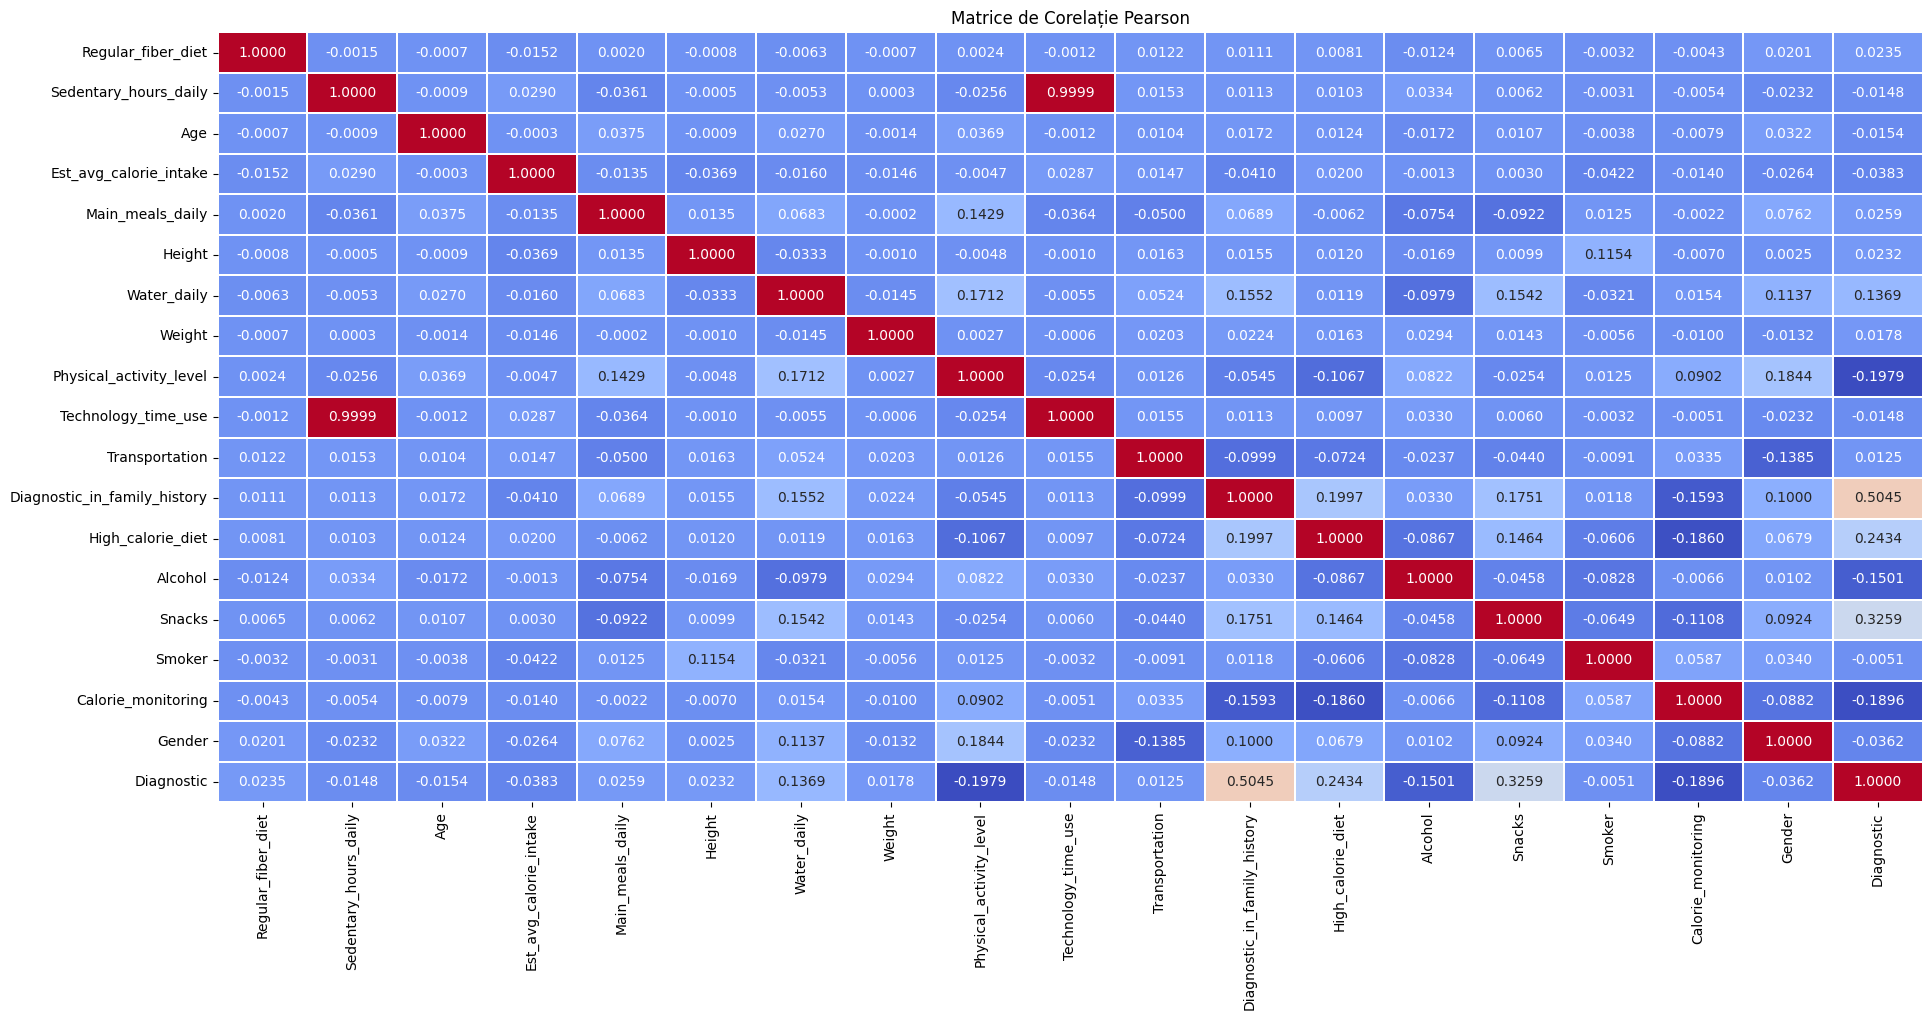

In [229]:
label_encoders = {}
for col in nominal_columns:
    label_encoders[col] = LabelEncoder()

encoded_nominal_cols = {}
for col in nominal_columns:
    encoded_nominal_cols[col] = label_encoders[col].fit_transform(dataset[col])

encoded_nominal_df = pd.DataFrame(encoded_nominal_cols)

merged_df = pd.concat([converted_numeric_df, encoded_nominal_df], axis=1)

covariance_matrix = merged_df.cov()

plt.figure(figsize=(22, 10))
sns.heatmap(covariance_matrix, annot=True, fmt=".4f", cmap='coolwarm', linewidths=0.01, cbar=False)
plt.title("Covariance Matrix")
plt.show()

correlation_matrix = merged_df.corr()

plt.figure(figsize=(22, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".4f", cmap='coolwarm', linewidths=0.01, cbar=False)
plt.title("Matrice de Corelație Pearson")
plt.show()



Observam ca una din coloanele Technology_Time_Use sau Sendentary_Hours_Daily ar putea sa dispara fara sa influenteze rezultatele

In [241]:
nominal_data = dataset[nominal_columns]

new_dataset = pd.concat([encoded_nominal_df, converted_numeric_df], axis=1)

new_dataset = remove_outliers(new_dataset, numeric_columns)

constant_imputer = SimpleImputer(strategy='constant', fill_value=0)
new_dataset['Weight'] = constant_imputer.fit_transform(new_dataset[['Weight']])

new_dataset[numeric_columns] =  StandardScaler().fit_transform(new_dataset[numeric_columns])

# https://medium.com/nerd-for-tech/removing-constant-variables-feature-selection-463e2d6a30d9

feature_selector = VarianceThreshold(threshold=0.25)  
selected_features = feature_selector.fit_transform(new_dataset[numeric_columns])

concol = [column for column in new_dataset[numeric_columns].columns 
          if column not in new_dataset[numeric_columns].columns[feature_selector.get_support()]]

new_dataset[numeric_columns].drop(concol,axis=1)

X_train, X_test, y_train, y_test = train_test_split(selected_features, new_dataset['Diagnostic'], test_size=0.2)

classifiers = {
    'RandomForest': (RandomForestClassifier(), {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 15, 20, 50, 100], 'max_samples' : [0.3, 0.5, 0.8, 1], 'bootstrap' : [True]}),
    'ExtraTrees': (ExtraTreesClassifier(), {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 15, 20, 50, 100], 'max_samples' : [0.3, 0.5, 0.8, 1], 'bootstrap' : [True]}),
    'GradientBoostedTrees': (XGBClassifier(), {'n_estimators': [50, 100, 200], 'max_depth': [3, 5], 'learning_rate': [0.01, 0.1, 0.05, 0.05]}),
    'SVM': (SVC(), {'kernel': ['linear', 'poly', 'rbf'], 'C': [0.1, 0.001, 2, 1, 10, 30, 50, 100]})
}


results = {
    'Classifier': [],
    'Parameters': [],
    'Accuracy Mean': [],
    'Precision Mean': [],
    'Recall Mean': [],
    'F1 Score Mean': [],
}

for name, (classifier, params) in classifiers.items():
    grid_search = GridSearchCV(classifier, params, cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    results['Classifier'].append(name)
    results['Parameters'].append(best_params)
    
    y_pred = grid_search.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision_1 = precision_score(y_test, y_pred, pos_label=1, average='macro')
    recall_1 = recall_score(y_test, y_pred, pos_label=1, average='macro')
    f1_1 = f1_score(y_test, y_pred, pos_label=1, average='macro')

    cm = confusion_matrix(y_test, y_pred)

    print(f"\nConfusion Matrix for {name} with best parameters {grid_search.best_params_}:")
    print(cm)
    
    results['Accuracy Mean'].append(np.mean(accuracy))
    results['Precision Mean'].append(np.mean(precision_1))
    results['Recall Mean'].append(np.mean(recall_1))
    results['F1 Score Mean'].append(np.mean(f1_1))


results_df = pd.DataFrame(results)

table_str = tabulate(results_df, headers='keys', tablefmt='grid')

print(table_str)




Confusion Matrix for RandomForest with best parameters {'bootstrap': True, 'max_depth': 50, 'max_samples': 0.8, 'n_estimators': 200}:
[[39  2  0  0  0  0  0]
 [ 1 47  0  0  0  0  0]
 [ 1  6 39  7  0  0  0]
 [ 2  3  4 54  1  1  0]
 [ 0  0  0  0 62  1  0]
 [ 0  0  1  1  0 56  0]
 [ 0  0  0  0  0  0 55]]

Confusion Matrix for ExtraTrees with best parameters {'bootstrap': True, 'max_depth': None, 'max_samples': 0.8, 'n_estimators': 200}:
[[39  1  0  0  1  0  0]
 [ 3 42  2  1  0  0  0]
 [ 0  6 39  6  1  0  1]
 [ 0  5  5 51  2  1  1]
 [ 0  1  0  1 60  1  0]
 [ 0  0  0  0  1 57  0]
 [ 0  0  0  0  0  0 55]]

Confusion Matrix for GradientBoostedTrees with best parameters {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200}:
[[38  1  0  0  1  0  1]
 [ 1 47  0  0  0  0  0]
 [ 1  7 43  2  0  0  0]
 [ 0  1  4 58  1  1  0]
 [ 0  0  3  0 59  1  0]
 [ 0  0  2  1  2 53  0]
 [ 0  0  0  0  0  0 55]]

Confusion Matrix for SVM with best parameters {'C': 100, 'kernel': 'rbf'}:
[[33  6  0  0  2  0  

Am testat separat si fara sa elimin outlierele, si SVM avea performante foare slabe (accuracy ~0.35). Imediat cum le-am eliminat, accuracy-ul la SVM a crescut. 

Cel mai bine s-au descurcat modelele bazate pe arbori pentru ca acestea construiesc mai multe modele (arbori) si le combina predictiile, spre desoebire de SVM care e sensibil la valori anormale => arborii sunt mai buni pentru generalizare.